# 5.2a、ARIMA模型拟合股票收盘价格序列发展
## data_hw5.1.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA

## 时序图、ACF图、PACF图

In [2]:
def drawer(input):
    plt.figure(figsize=(10,8))
    series = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    acf=plt.subplot2grid((2,2),(1,0))
    pacf=plt.subplot2grid((2,2),(1,1))
    series.plot(input, '*-')
    plot_acf(input,ax=acf)
    plot_pacf(input,ax=pacf)
    plt.show()
    plt.close()

## statsmodels自帶的LB test

In [10]:
def purerandtest(y):
    a,b=acorr_ljungbox(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

## 计算差分

In [11]:
def caculatediff(diff, step, input):
    if(step!=0):
        input = input[step:] - input[:-step]
    if (diff == 0):
        return input
    input = input[1:] - input[:-1]
    return caculatediff(diff - 1, 0, input)

## 对比图

In [12]:
def drawcompare(series, prediction):
    plt.plot(series, "*-", label='observe')
    plt.plot(prediction, label='fittes')
    plt.legend()
    plt.show()
    plt.close()

## 数据读取

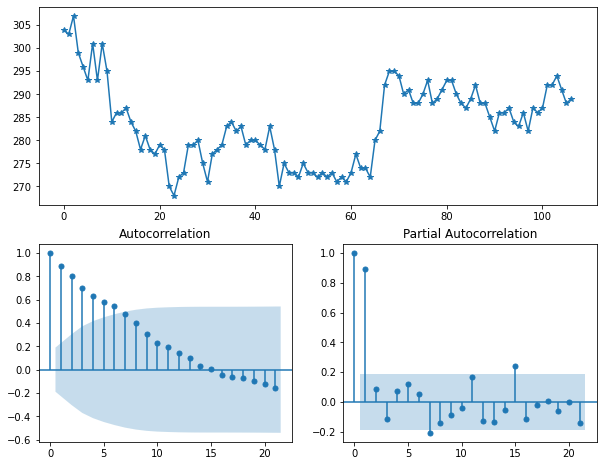

In [14]:
filename = "data_hw5.1.csv"
series = pd.read_csv(filename, header=None)
series.iloc[:, 0] = series.iloc[:, 0].astype("float")
series = series.values[:, 0]
drawer(series)

## 1階差分与白噪声检验

D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


----time series: LB pure randomness test----
           LB    Pvalue  lags
0    2.606898  0.106400     1
1    2.647802  0.266095     2
2    3.179307  0.364797     3
3    4.073987  0.396085     4
4    4.184494  0.523171     5
5    5.437739  0.489013     6
6    9.540891  0.216117     7
7    9.903347  0.271875     8
8   10.171241  0.336801     9
9   12.228947  0.270026    10
10  12.708416  0.312810    11
11  12.721725  0.389587    12
12  12.928357  0.453361    13
13  15.370160  0.353328    14
14  18.325620  0.245934    15
15  20.919301  0.181633    16
16  21.135484  0.220289    17
17  21.685578  0.246244    18
18  21.858314  0.291364    19
19  22.103532  0.334919    20
20  27.447673  0.156522    21
21  27.456326  0.194405    22
22  27.815092  0.222855    23
23  28.051047  0.257893    24
24  28.120367  0.302342    25
25  33.781921  0.140603    26
26  35.217564  0.133440    27
27  35.418857  0.158001    28
28  35.460794  0.189806    29
29  35.851022  0.212995    30
30  35.897704  0.249612  

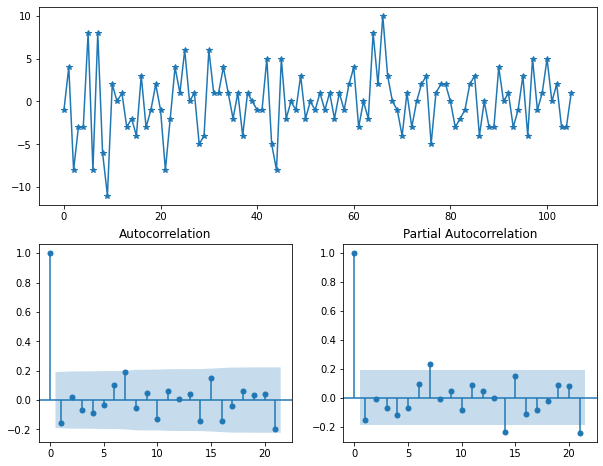

In [15]:
diff1 = caculatediff(1,0,series)
purerandtest(diff1)
drawer(diff1)

## ARIMA(p,d,q)建模參數估計

In [16]:
model = ARIMA(series, order=(2, 1, 2)).fit()
print('----fitting summary----')
print(model.summary())

----fitting summary----
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  107
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -284.267
Date:                Wed, 17 Nov 2021   AIC                            578.534
Time:                        17:03:01   BIC                            591.851
Sample:                             0   HQIC                           583.932
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4274      0.279      5.115      0.000       0.881       1.974
ar.L2         -0.7323      0.197     -3.719      0.000      -1.118      -0.346
ma.L1         -1.5707      0

## 殘差白噪聲檢驗/模型顯著性檢驗

In [17]:
resid=model.resid
print('\n----residual pure randomness test')
purerandtest(resid)


----residual pure randomness test
----time series: LB pure randomness test----
          LB    Pvalue  lags
0   0.001346  0.970732     1
1   0.024406  0.987871     2
2   0.094172  0.992527     3
3   0.112642  0.998472     4
4   0.135348  0.999658     5
5   0.194452  0.999858     6
6   0.260583  0.999938     7
7   0.324513  0.999975     8
8   0.355104  0.999993     9
9   0.519099  0.999992    10
10  0.519982  0.999998    11
11  0.521655  1.000000    12
12  0.521722  1.000000    13
13  0.542747  1.000000    14
14  0.547664  1.000000    15
15  0.583210  1.000000    16
16  0.587847  1.000000    17
17  0.602106  1.000000    18
18  0.605678  1.000000    19
19  0.608277  1.000000    20
20  0.615208  1.000000    21
21  0.722077  1.000000    22
22  0.745816  1.000000    23
23  0.750174  1.000000    24
24  0.750415  1.000000    25
25  0.806800  1.000000    26
26  0.806843  1.000000    27
27  0.810549  1.000000    28
28  0.841199  1.000000    29
29  0.881697  1.000000    30
30  0.909602  1.00000

D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## 預測

In [18]:
prediction = model.get_prediction(start=0,end=len(series)-1+10,dynamic=False)
print('\n----fitted confidence interval: %d %%'%((1-0.05)*100))
print(prediction.summary_frame(alpha=0.05))


----fitted confidence interval: 95 %
y          mean      mean_se  mean_ci_lower  mean_ci_upper
0      0.000000  1000.006536   -1959.976795    1959.976795
1    303.999577     3.615610     296.913111     311.086043
2    303.105950     3.595096     296.059692     310.152209
3    306.636196     3.574088     299.631112     313.641281
4    299.626328     3.561783     292.645362     306.607294
..          ...          ...            ...            ...
112  290.070053     6.903967     276.538525     303.601580
113  289.710121     7.472519     275.064253     304.355990
114  289.515650     8.072109     273.694607     305.336693
115  289.501649     8.671551     272.505722     306.497576
116  289.624082     9.239847     271.514315     307.733849

[117 rows x 4 columns]


## 畫圖

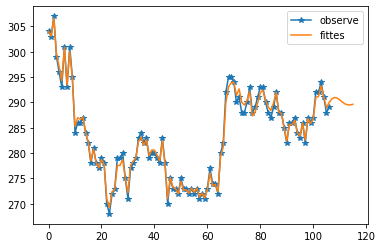

In [19]:
prediction = prediction.summary_frame(alpha=0.05).iloc[:,[0]]
prediction = prediction.values[:, 0]
drawcompare(series,prediction[1:])